In [168]:
import math
import json
from pprint import pprint
import numpy as np 
import matplotlib.pyplot as plt 
from numpy import genfromtxt
import os
import math


In [227]:
with open('QTable_Alpha_0_5_Gamma_1_Decay_0_97.json') as f:
    Qtable = json.load(f)
print("Length of QTable: " + str(len(Qtable)))

Length of QTable: 341


In [230]:
Qtable

{'0:0:0:227:0': [0.21713723127730186,
  0.2612011872352741,
  0.32040713788926956,
  0.17726029100500454],
 '0:0:90:227:0': [0.2671336258298834,
  0.3154226081739125,
  0.23291294540395024,
  0.29433959900634366],
 '0:0:180:227:0': [0.12176371097564698,
  0.09856708645820618,
  0.08518353879451751,
  0.3047787485626759],
 '0:0:270:227:0': [0.07265624999999998,
  0.01867026060819626,
  0.26981141375326845,
  0.13057113528251646],
 '1:0:270:227:0': [-0.005,
  0.0071875,
  0.31103515624999994,
  0.18500930717214942],
 '2:0:270:227:0': [-0.012499999999999999,
  -0.005,
  0.1489641523361206,
  0.0021874999999999976],
 '1:0:0:227:0': [0.3512626886367797,
  0.22503906249999994,
  0.10973159790039061,
  0.26726562499999995],
 '1:0:90:227:0': [0.303229680864606,
  0.5635393377630361,
  0.31495618853019547,
  0.23104125976562495],
 '1:0:180:227:0': [0.16161240100860594,
  0.2656146777421236,
  0.015625,
  0.34474133280804387],
 '2:0:90:227:0': [0.3168856085107017,
  0.12653279622342323,
  0.1972

In [228]:
xs = []; zs = []; yaws = []
for key in Qtable:
    values = key.split(":")
    x = int(values[0])
    z = int(values[1])
    yaw = int(values[2])
    if x not in xs: xs.append(x)
    if z not in zs: zs.append(z)
    if yaw not in yaws: yaws.append(yaw)
    
print(xs); print(zs); print(yaws)

[0, 1, 2, 3, 4, -1, 5, 6, 7, 8, 9, 10, -2, 11, 12, 13, 14, 15, 16, -3, -4, -5]
[0, -1, 1, 2, 3, -2, -3, 4, 5, 6, -4, -5, -6, -7, -8, 7, 8, 9, 10]
[0, 90, 180, 270]


In [215]:
Qtable

{'1:0:0:55:0': [0.2590259166710918,
  -0.06915384292602539,
  -0.04058418846263834,
  -0.06941907936476721],
 '1:0:90:55:0': [-0.05087860107421875,
  0.02266978233375147,
  -0.050057744979858404,
  -0.054474052097648384],
 '1:0:180:55:0': [-0.04872167314931451,
  0.21797493945498797,
  -0.05545661143039947,
  -0.04693469047546387],
 '1:1:180:55:0': [-0.031070844712046346,
  0.2042434805341451,
  -0.046563720703125006,
  -0.04087444714396592],
 '1:2:180:55:0': [-0.015269740831266886,
  -0.02807861328125,
  0.16831093845681055,
  -0.0406195068359375],
 '1:1:270:55:0': [-0.04093406677246095,
  0.04632356480380363,
  -0.04318126678466797,
  0.27005388964229055],
 '0:1:270:55:0': [-0.04418193817138673,
  -0.045448913580039524,
  -0.041606445312500004,
  0.20414023597785086],
 '0:1:0:55:0': [-0.039484863281250004,
  -0.04278961182804779,
  -0.0399462890625,
  -0.042367553710937506],
 '2:1:270:55:0': [-0.0330322265625,
  -0.04431732177734375,
  0.01940049352388975,
  -0.036044921875],
 '2:1:0

In [231]:
for key in Qtable:
    values = key.split(":")
    x = int(values[0])
    z = int(values[1])
    y = int(values[3])
    pitch = int(values[4])
    reward = max(Qtable[key])
    if y is not 227:
        print(key)

0:-3:180:226:0
0:-3:270:226:0
0:-3:0:226:0
0:-7:270:226:0
0:-7:0:226:0
0:-7:90:226:0
0:-3:90:226:0
0:7:90:226:0
0:7:180:226:0


In [236]:
positiveGrid(xs,zs,Qtable)

ValueError: operands could not be broadcast together with shapes (36,0) (36,36) (36,0) 

In [237]:
printGrid(xs,zs,Qtable)

ValueError: operands could not be broadcast together with shapes (36,0) (36,36) (36,0) 

In [234]:
def positiveGrid(xs,zs,Qtable):
    
    xLen = max(xs); zLen = max(zs);  
    positiveGrid = np.zeros(((xLen+1)*36,(zLen+1)*36))
    block = np.ones((int(36),int(36)))

    for key in Qtable:
        values = key.split(":")
        x = float(values[0])
        z = float(values[1])
        reward = max(Qtable[key])
        if reward > 0:
            gridXStart = int(x*36)
            gridXEnd = int(x*36 + 36)
            gridZStart = int(z*36)
            gridZEnd = int(z*36 + 36)
            #print("%s:%s"%(int(x),int(z)))

            positiveGrid[gridXStart:gridXEnd,gridZStart:gridZEnd] += block*(reward/4)

    ax = plt.axes()
    ax.imshow(positiveGrid)

    ax.set_xticks([(i*36 + 18 ) for i in range(xLen+1)]);
    ax.set_xticklabels([str(i) for i in range(xLen+1)]);
    ax.set_yticks([(i*36 + 18 ) for i in range(xLen+1)]);
    ax.set_yticklabels([str(i) for i in range(xLen+1)]);
    
def printGrid(xs,zs,Qtable):

    xLen = max(xs); zLen = max(zs);  
    grid = np.ones(((xLen+1)*36,(zLen+1)*36))
    block = np.ones((int(36),int(36)))

    for key in Qtable:
        values = key.split(":")
        x = float(values[0])
        z = float(values[1])
        reward = max(Qtable[key])
        if reward > 0:
            reward *= 0.4

        gridXStart = int(x*36)
        gridXEnd = int(x*36 + 36)
        gridZStart = int(z*36)
        gridZEnd = int(z*36 + 36)

        grid[gridXStart:gridXEnd,gridZStart:gridZEnd] += block*(reward/4)

    ax = plt.axes()
    ax.imshow(grid)
    plt.xlabel("X-Position")
    plt.ylabel("Y-Position")
    plt.title("Visual Representation of Q-Table")

    ax.set_xticks([(i*36 + 18 ) for i in range(xLen+1)]);
    ax.set_xticklabels([str(i) for i in range(xLen+1)]);
    ax.set_yticks([(i*36 + 18 ) for i in range(xLen+1)]);
    ax.set_yticklabels([str(i) for i in range(xLen+1)]);

In [ ]:
#"Results_Alpha_0_1_Gamma_0_5_Decay_0_97.csv" - good - 0.09
#"Results_Alpha_0_1_Gamma_1_Decay_0_97.csv" - good - 0.14
#"Results_Alpha_0_5_Gamma_0_5_Decay_0_97.csv" - headbanging - -6.00
#"Results_Alpha_0_5_Gamma_1_Decay_0_97.csv" - good - 0.28
#"Results_Alpha_0_8_Gamma_0_5_Decay_0_97.csv" - headbanging - -6.58
#"Results_Alpha_0_8_Gamma_1_Decay_0_97.csv" - good - 0.28

# Headbanging is with (Alpha = 0.5 & Gamma = 0.5) and (Alpha = 0.8 & Gamma = 0.5) 


Games:  200  - Average Time:  342.785
Average reward for the last 20 games: 0.09 with an epsilon of 0.00
Scores that have reached over 0: 75 out of 200
Scores that have reached -2.5: 14 out of 200


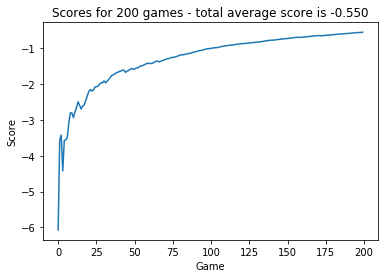

In [102]:
plotScores("Results_Alpha_0_1_Gamma_0_5_Decay_0_97.csv")

Games:  173  - Average Time:  199.8612716763006
Average reward for the last 5 games: 0.27 with an epsilon of 0.00
Scores that have reached over 0: 152 out of 173
Scores that have reached -2.5: 1 out of 173


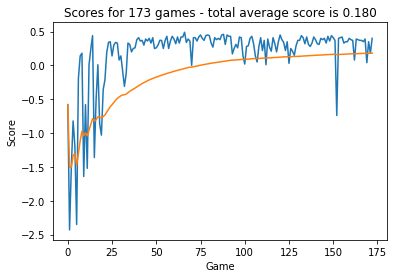

In [50]:
plotScores("QLearning_completeAction\Results_Alpha_0_8_Gamma_1_Decay_0_97.csv")

In [174]:
def plotTestScores(file_list):
    lineNames = []
    for file in file_list:
        fileName = file.split("Alpha")
        fileName = fileName[1].split("Gamma")
        alpha = fileName[0]
        fileName = fileName[1].split("Decay")
        gamma = fileName[0]
        alphaSplit = alpha.split("_")
        alphaTrue = str(alphaSplit[1] + "." + alphaSplit[2])
        gammaSplit = gamma.split("_")
        if len(gammaSplit) == 3: gammaTrue = gammaSplit[1]
        else: gammaTrue = str(gammaSplit[1] + "." + gammaSplit[2])
        lineName = ("Alpha:%s"%(alphaTrue))
        lineNames.append(lineName)
        
        my_data = genfromtxt(file, delimiter=',')
        scores = [x[0] for x in my_data]
        testScores = scores[-20:]
        time = [x[2] for x in my_data]
        epsilon = [x[-1] for x in my_data]
        
        averageTestScores = []
        for i,testScore in enumerate(testScores):
            averageTestScores.append((sum(testScores[:(i+1)])/(i+1)))

        plt.plot(averageTestScores);
    
    
    plt.title("Average Rewards for Testing of 20 games with Gamma = %s"%(gammaTrue));
    plt.xlabel("Training Steps");
    plt.ylabel("Average Reward");
    plt.legend(lineNames)
    plt.axhline(0,color='grey',linestyle='--')
        

In [334]:
def plotAverageScores(file_list):
    lineNames = []
    for file in file_list:
        alphaTrue,gammaTrue = findAlphaGamme(file)
        lineName = ("Alpha:%s"%(alphaTrue))
        lineNames.append(lineName)
        
        my_data = genfromtxt(file, delimiter=',')
        scores = [x[0] for x in my_data]
        time = [x[2] for x in my_data]
        epsilon = [x[-1] for x in my_data]
        
        averageScores = []
        for i,score in enumerate(scores):
            averageScores.append((sum(scores[:(i+1)])/(i+1)))
        
        
        plt.plot(averageScores);
    
    
    plt.title("Average Rewards for Training with Gamma = %s"%(gammaTrue));
    plt.xlabel("Training Steps");
    plt.ylabel("Average Reward");
    plt.legend(lineNames)
    plt.axhline(0,color='grey',linestyle='--')
        

In [335]:
file_list = ["Results_Alpha_0_1_Gamma_1_Decay_0_97.csv",
             "Results_Alpha_0_5_Gamma_1_Decay_0_97.csv",
             "Results_Alpha_0_8_Gamma_1_Decay_0_97.csv",
            ]

#plotAverageScores(file_list)
plotTestScores(file_list)

OSError: Results_Alpha_0_1_Gamma_1_Decay_0_97.csv not found.

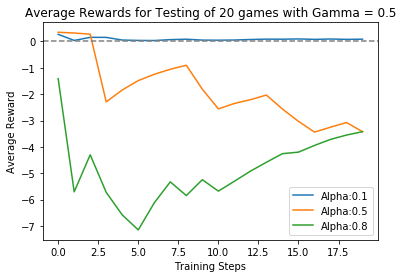

In [179]:
file_list = ["Results_Alpha_0_1_Gamma_0_5_Decay_0_97.csv",
             "Results_Alpha_0_5_Gamma_0_5_Decay_0_97.csv",
             "Results_Alpha_0_8_Gamma_0_5_Decay_0_97.csv",
            ]

#plotAverageScores(file_list)
plotTestScores(file_list)

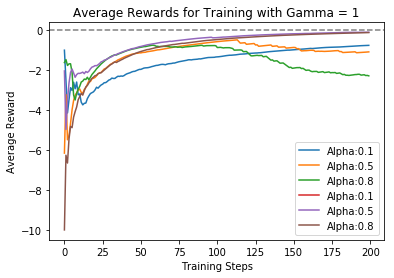

In [336]:
file_list = ["QLearning_TrainingRun_2/2_Results_Alpha_0_1_Gamma_0_5_Decay_0_97.csv",
             "QLearning_TrainingRun_2/2_Results_Alpha_0_5_Gamma_0_5_Decay_0_97.csv",
             "QLearning_TrainingRun_2/2_Results_Alpha_0_8_Gamma_0_5_Decay_0_97.csv",
             "QLearning_TrainingRun_2/2_Results_Alpha_0_1_Gamma_1_Decay_0_97.csv",
             "QLearning_TrainingRun_2/2_Results_Alpha_0_5_Gamma_1_Decay_0_97.csv",
             "QLearning_TrainingRun_2/2_Results_Alpha_0_8_Gamma_1_Decay_0_97.csv",
            ]

#for file in file_list:
 #   plotScores(file)

plotAverageScores(file_list)

In [14]:
def findAlphaGamme(file):
    fileName = file.split("Alpha")
    fileName = fileName[1].split("Gamma")
    alpha = fileName[0]
    fileName = fileName[1].split("Decay")
    gamma = fileName[0]
    alphaSplit = alpha.split("_")
    alphaTrue = str(alphaSplit[1] + "." + alphaSplit[2])
    gammaSplit = gamma.split("_")
    if len(gammaSplit) == 3: gammaTrue = gammaSplit[1]
    else: gammaTrue = str(gammaSplit[1] + "." + gammaSplit[2]) 
    return alphaTrue,gammaTrue

Final Average Score for Alpha:0.5;Gamma:0.5: -1.66
Final Average Score for Alpha:0.8;Gamma:0.5: -3.81
Final Average Score for Alpha:0.1;Gamma:0.5: -0.02


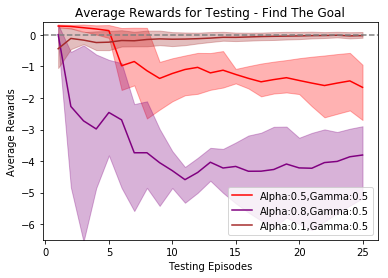

In [115]:
#file_list = [["QLearning_TrainingRun_1/1_Results_Alpha_0_5_Gamma_1_Decay_0_97.csv",
 #            "QLearning_TrainingRun_2/2_Results_Alpha_0_5_Gamma_1_Decay_0_97.csv",
  #           "QLearning_TrainingRun_3/3_Results_Alpha_0_5_Gamma_1_Decay_0_97.csv"],
   #          ["QLearning_TrainingRun_1/1_Results_Alpha_0_8_Gamma_1_Decay_0_97.csv",
    #         "QLearning_TrainingRun_2/2_Results_Alpha_0_8_Gamma_1_Decay_0_97.csv",
     #        "QLearning_TrainingRun_3/3_Results_Alpha_0_8_Gamma_1_Decay_0_97.csv"],
      #       ["QLearning_TrainingRun_1/1_Results_Alpha_0_1_Gamma_1_Decay_0_97.csv",
       #      "QLearning_TrainingRun_2/2_Results_Alpha_0_1_Gamma_1_Decay_0_97.csv",
        #     "QLearning_TrainingRun_3/3_Results_Alpha_0_1_Gamma_1_Decay_0_97.csv"],
             
file_list = [["QLearning_TrainingRun_1/1_Results_Alpha_0_5_Gamma_0_5_Decay_0_97.csv",
            "QLearning_TrainingRun_2/2_Results_Alpha_0_5_Gamma_0_5_Decay_0_97.csv",
            "QLearning_TrainingRun_3/3_Results_Alpha_0_5_Gamma_0_5_Decay_0_97.csv"],
            ["QLearning_TrainingRun_1/1_Results_Alpha_0_8_Gamma_0_5_Decay_0_97.csv",
             "QLearning_TrainingRun_2/2_Results_Alpha_0_8_Gamma_0_5_Decay_0_97.csv",
             "QLearning_TrainingRun_3/3_Results_Alpha_0_8_Gamma_0_5_Decay_0_97.csv"],
             ["QLearning_TrainingRun_1/1_Results_Alpha_0_1_Gamma_0_5_Decay_0_97.csv",
             "QLearning_TrainingRun_2/2_Results_Alpha_0_1_Gamma_0_5_Decay_0_97.csv",
             "QLearning_TrainingRun_3/3_Results_Alpha_0_1_Gamma_0_5_Decay_0_97.csv"],
            ]

plotAverageErrorScores(file_list)

In [114]:
def plotAverageErrorScores(file_list):

    lineNames = []
    colors = ["red","purple","brown"]
    for j,fileBunch in enumerate(file_list):
        allScores = []
        for file in fileBunch:
            alphaTrue,gammaTrue = findAlphaGamme(file)
            my_data = genfromtxt(file, delimiter=',')
            scores = [x[0] for x in my_data if math.isnan(x[0]) != True]
            
            scores = scores[-25:]
            
            averageScores = []
            for i,score in enumerate(scores):
                averageScores.append((sum(scores[:(i+1)])/(i+1)))
            allScores.append(averageScores)
            avScore = []
            minScore = []
            maxScore = []
            x = []

        for i in range(np.shape(allScores)[1]):
            avScore.append((allScores[0][i]+allScores[1][i]+allScores[2][i])/3) 
            minScore.append(min(allScores[0][i],allScores[1][i],allScores[2][i]))
            maxScore.append(max(allScores[0][i],allScores[1][i],allScores[2][i]))
            x.append(i+1)
        
        lineName = ("Alpha:%s,Gamma:%s"%(alphaTrue,gammaTrue))
        lineNames.append(lineName)
        plt.plot(x,avScore,color = colors[j])
        plt.fill_between(x,minScore,maxScore, alpha=0.3,color = colors[j])
        
        print("Final Average Score for Alpha:%s;Gamma:%s: %0.2f"%(alphaTrue,gammaTrue,avScore[-1]))
        
        
    plt.legend(lineNames,loc='lower right')
    plt.axhline(0,color='grey',linestyle='--')
    #plt.xlim([150,205])
    plt.ylim([-6.5,0.4])
    
    plt.title("Average Rewards for Testing - Find The Goal");
    #plt.title("Average Rewards for Training - Find The Goal");
    plt.ylabel("Average Rewards");
    #plt.xlabel("Training Steps");
    plt.xlabel("Testing Episodes");
    
    

In [224]:
def plotScores(file):
    
    #alphaTrue,gammaTrue = findAlphaGamme(file)
        
    my_data = genfromtxt(file, delimiter=',')
    scores = [x[0] for x in my_data]
    time = [x[2] for x in my_data]
    epsilon = [x[-1] for x in my_data]
    
    #scores = scores[-50:]
    
    #print("\nAlpha:%s;Gamma:%s"%(alphaTrue,gammaTrue))
    print("Games: " , str(len(scores)), " - Average Time: ", str(sum(time)/len(scores)))
    print("Average reward for the last 20 games: %.2f with an epsilon of %.2f" % (sum(scores[-20:])/min(len(scores),20), epsilon[-1]))
    plt.plot(scores);

    lowCount = 0
    highCount = 0
    for score in scores:
        if score < -2.4:
            lowCount += 1
        if score > 0:
            highCount += 1
    print("Scores that have reached over 0: %s out of %s"%(highCount,len(scores)))
    print("Scores that have reached -2.5: %s out of %s"%(lowCount,len(scores)))
    
    averageScores = []
    for i,score in enumerate(scores):
        averageScores.append((sum(scores[:(i+1)])/(i+1)))

    
    plt.plot(averageScores);
    #plt.title("Scores for %s games - total average score is %.3f"%(len(averageScores),averageScores[-1]));
    plt.title("Scores for Training - Tricky Arena")
    plt.xlabel("Game");
    plt.ylabel("Score");
    plt.axhline(0,color='grey',linestyle='--')
    plt.legend(["Score","Average Score"])

Games:  14  - Average Time:  341.07142857142856
Average reward for the last 20 games: -1.05 with an epsilon of 0.67
Scores that have reached over 0: 2 out of 14
Scores that have reached -2.5: 0 out of 14


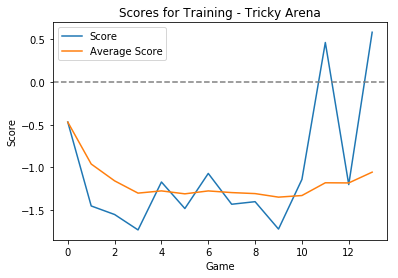

In [226]:
#plotScores("Results_Alpha_0_8_Gamma_1_Decay_0_98.csv")
plotScores("Results_Alpha_0_5_Gamma_1_Decay_0_97.csv")